In [2]:
import pandas as pd
import numbers as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import pandas as pd

# Assuming the path to your file is correct
file_path = 'C:\\Users\\USER\\OneDrive\\Desktop\\SALES PREDICTION PROJECT\\AS_SALES.csv'
df = pd.read_csv(file_path)
print(df)


           Bill Date Bill Time Transaction Type          Bill No.  \
0         01-06-2022  10:54:13            Sales  3488301I22001538   
1         01-06-2022  10:54:13            Sales  3488301I22001538   
2         01-06-2022  10:54:13            Sales  3488301I22001538   
3         01-06-2022  10:54:13            Sales  3488301I22001538   
4         01-06-2022  10:54:13            Sales  3488301I22001538   
...              ...       ...              ...               ...   
37975     30-06-2024  21:54:39          Returns  3488302I24000420   
37976     30-06-2024  21:54:39            Sales  3488302I24000420   
37977     30-06-2024  12:58:32            Sales  3488301I24001919   
37978     30-06-2024  14:17:17            Sales  3488301I24001921   
37979  Grand Total :       NaN              NaN               NaN   

            Salesman Sales Promo Code  \
0          ANCY SOBY       AE-T000076   
1          ANCY SOBY       AE-T000076   
2          ANCY SOBY       AE-T000076   
3      

In [20]:
print(df.columns)


Index(['Bill Date', 'Bill Time', 'Transaction Type', 'Bill No.', 'Salesman',
       'Sales Promo Code', 'Sales Promo Description', 'Original Bill No',
       'Sales Order Number', 'Stock No.', 'Item Description', 'Department',
       'Class Name', 'Sub Class', 'Style Code', 'Sleeve Code', 'Size Code',
       'MRP', 'Quantity', 'Value', 'Tax Percent', 'VAT Amount', 'SGST Value',
       'CGST Value', 'IGST Value', 'CESS Value', 'Item Discount',
       'Bill Discount', 'Total Discount'],
      dtype='object')


In [22]:

# Filter out rows with non-date values in the 'Bill Date' column
df = df[pd.to_datetime(df['Bill Date'], format='%d-%m-%Y', errors='coerce').notna()]

# Convert the 'Bill Date' column to datetime
df['Bill Date'] = pd.to_datetime(df['Bill Date'], format='%d-%m-%Y')

# Extract year and month from the 'Bill Date' column
df['YearMonth'] = df['Bill Date'].dt.to_period('M')

# Assuming the column 'Product Type' represents the type of product
# Group by Product Type and YearMonth, then aggregate sales
monthly_sales = df.groupby(['Class Name', 'YearMonth'])['Value'].sum().reset_index()

# Find the top product type for each month
top_products = monthly_sales.loc[monthly_sales.groupby('YearMonth')['Value'].idxmax()]

print("Top product type for each month:")
print(top_products)

# Optionally, you can print or display the entire monthly_sales DataFrame to see sales for each product type and month
print("\nMonthly Sales Summary:")
print(monthly_sales)


Top product type for each month:
    Class Name YearMonth       Value
859      Shirt   2022-06   873283.06
860      Shirt   2022-07  1189142.23
861      Shirt   2022-08  1119938.13
862      Shirt   2022-09  1216239.74
863      Shirt   2022-10   730186.60
864      Shirt   2022-11   795815.61
865      Shirt   2022-12  1320111.82
866      Shirt   2023-01   825378.78
867      Shirt   2023-02   703323.17
868      Shirt   2023-03   742334.44
869      Shirt   2023-04  1149827.93
870      Shirt   2023-05   782951.08
871      Shirt   2023-06   924895.44
872      Shirt   2023-07   973951.64
873      Shirt   2023-08  1530818.33
874      Shirt   2023-09   745199.91
875      Shirt   2023-10   844468.03
876      Shirt   2023-11   712557.67
877      Shirt   2023-12  1590458.70
878      Shirt   2024-01  1255932.50
879      Shirt   2024-02   699089.10
880      Shirt   2024-03   985646.13
881      Shirt   2024-04  1235552.91
882      Shirt   2024-05  1184224.67
883      Shirt   2024-06  1291655.37

Mont

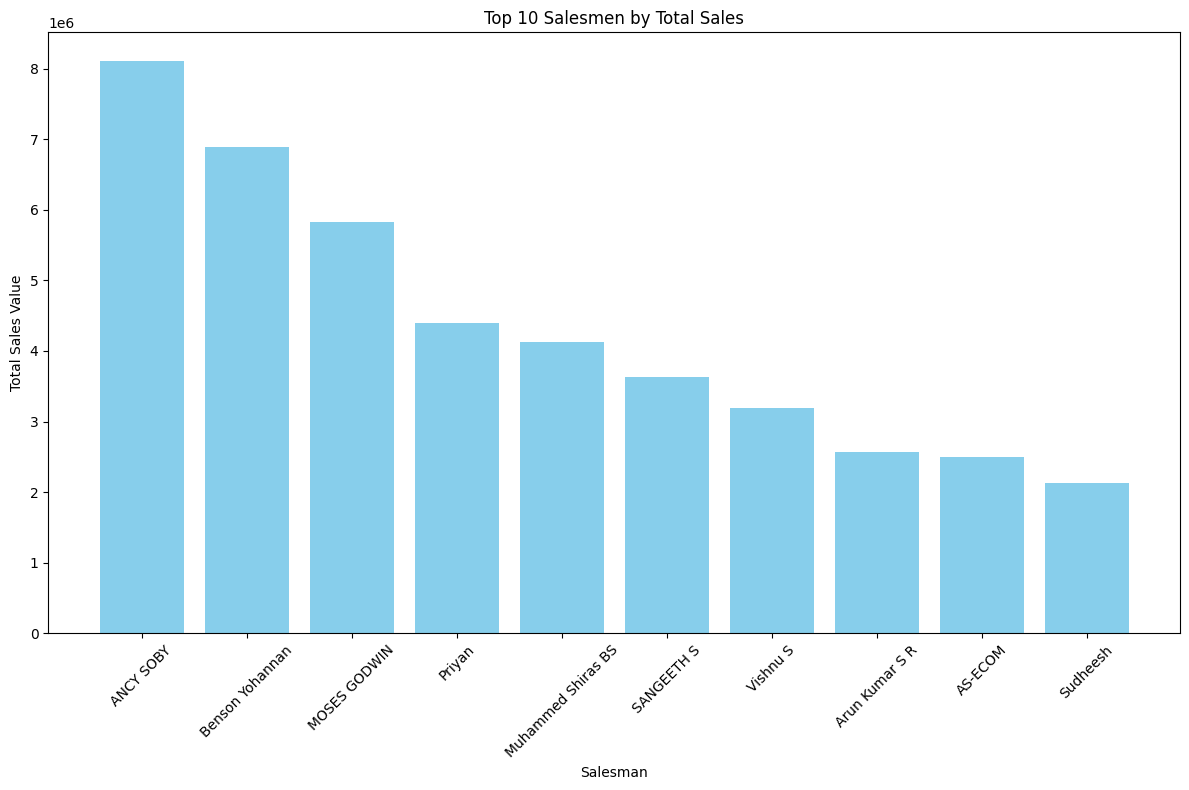

Top product type for each month:
     Class Name            Salesman YearMonth      Value
3493      Shirt          SANGEETH S   2022-06  289159.93
3494      Shirt          SANGEETH S   2022-07  417991.40
3495      Shirt          SANGEETH S   2022-08  372648.36
3496      Shirt          SANGEETH S   2022-09  402990.08
3456      Shirt  Muhammed Shiras BS   2022-10  183779.01
3457      Shirt  Muhammed Shiras BS   2022-11  195516.22
3458      Shirt  Muhammed Shiras BS   2022-12  333360.05
3459      Shirt  Muhammed Shiras BS   2023-01  235626.33
3460      Shirt  Muhammed Shiras BS   2023-02  130630.44
3512      Shirt            Sudheesh   2023-03  144688.29
3433      Shirt        MOSES GODWIN   2023-04  283167.22
3384      Shirt     Benson Yohannan   2023-05  177950.41
3385      Shirt     Benson Yohannan   2023-06  164299.12
3386      Shirt     Benson Yohannan   2023-07  305174.39
3288      Shirt           ANCY SOBY   2023-08  279021.21
3438      Shirt        MOSES GODWIN   2023-09  154434.9

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


# Filter out rows with non-date values in the 'Bill Date' column
df = df[pd.to_datetime(df['Bill Date'], format='%d-%m-%Y', errors='coerce').notna()]

# Convert the 'Bill Date' column to datetime
df['Bill Date'] = pd.to_datetime(df['Bill Date'], format='%d-%m-%Y')

# Extract year and month from the 'Bill Date' column
df['YearMonth'] = df['Bill Date'].dt.to_period('M')

# Group by 'Class Name', 'Salesman', and 'YearMonth', then aggregate sales
monthly_sales = df.groupby(['Class Name', 'Salesman', 'YearMonth'])['Value'].sum().reset_index()

# Aggregating total sales by Salesman
total_sales_by_salesman = monthly_sales.groupby('Salesman')['Value'].sum().reset_index()

# Sort the salesmen by total sales and select the top 10
top_10_salesmen = total_sales_by_salesman.sort_values(by='Value', ascending=False).head(10)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_10_salesmen['Salesman'], top_10_salesmen['Value'], color='skyblue')
plt.xlabel('Salesman')
plt.ylabel('Total Sales Value')
plt.title('Top 10 Salesmen by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top product type for each month:")
# Find the top product type for each month
top_products = monthly_sales.loc[monthly_sales.groupby('YearMonth')['Value'].idxmax()]
print(top_products)

print("\nMonthly Sales Summary:")
# Display the entire monthly_sales DataFrame to see sales for each product type and month
print(monthly_sales)



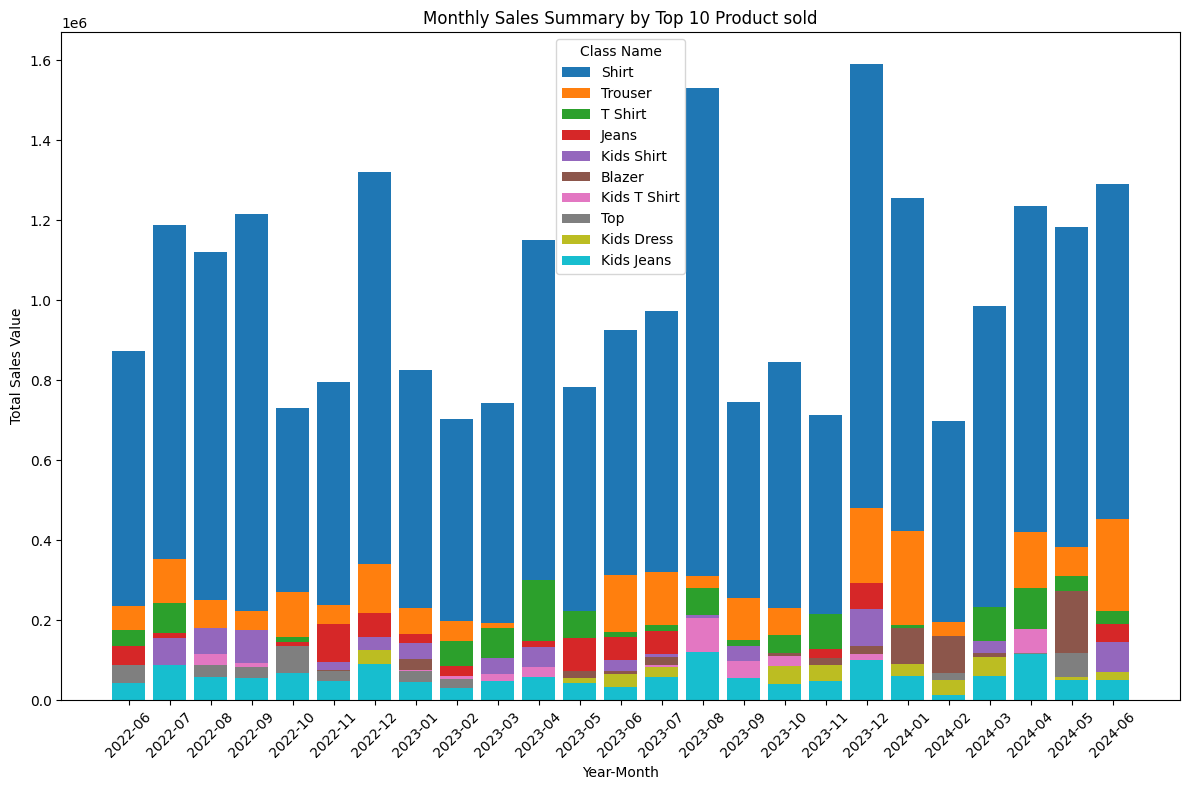

Top 10 Class Names by Total Sales:
      Class Name        Value
65         Shirt  25422982.99
74       Trouser   7200441.23
70       T Shirt   5039769.61
13         Jeans   3801600.13
28    Kids Shirt   3223913.21
3         Blazer   2474476.62
34  Kids T Shirt   2259656.42
73           Top   1788900.69
21    Kids Dress   1632111.18
25    Kids Jeans   1475786.95

Monthly Sales Summary for Top 10 Class Names:
     Class Name YearMonth      Value
53       Blazer   2022-06   64431.89
54       Blazer   2022-07   69250.81
55       Blazer   2022-08   84949.64
56       Blazer   2022-09   54474.21
57       Blazer   2022-10  101325.69
...         ...       ...        ...
1047    Trouser   2024-02  196248.27
1048    Trouser   2024-03  228503.99
1049    Trouser   2024-04  421470.61
1050    Trouser   2024-05  383350.72
1051    Trouser   2024-06  453605.89

[250 rows x 3 columns]


In [24]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter out rows with non-date values in the 'Bill Date' column
df = df[pd.to_datetime(df['Bill Date'], format='%d-%m-%Y', errors='coerce').notna()]

# Convert the 'Bill Date' column to datetime
df['Bill Date'] = pd.to_datetime(df['Bill Date'], format='%d-%m-%Y')

# Extract year and month from the 'Bill Date' column
df['YearMonth'] = df['Bill Date'].dt.to_period('M')

# Group by 'Class Name' and 'YearMonth', then aggregate sales
monthly_sales = df.groupby(['Class Name', 'YearMonth'])['Value'].sum().reset_index()

# Aggregating total sales by Class Name
total_sales_by_class = monthly_sales.groupby('Class Name')['Value'].sum().reset_index()

# Sort the class names by total sales and select the top 10
top_10_classes = total_sales_by_class.sort_values(by='Value', ascending=False).head(10)

# Plotting the bar graph for the top 10 class names
plt.figure(figsize=(12, 8))
for class_name in top_10_classes['Class Name'].unique():
    class_data = monthly_sales[monthly_sales['Class Name'] == class_name]
    plt.bar(class_data['YearMonth'].astype(str), class_data['Value'], label=class_name)

plt.xlabel('Year-Month')
plt.ylabel('Total Sales Value')
plt.title('Monthly Sales Summary by Top 10 Product sold')
plt.legend(title='Class Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 Class Names by Total Sales:")
print(top_10_classes)

print("\nMonthly Sales Summary for Top 10 Class Names:")
print(monthly_sales[monthly_sales['Class Name'].isin(top_10_classes['Class Name'])])


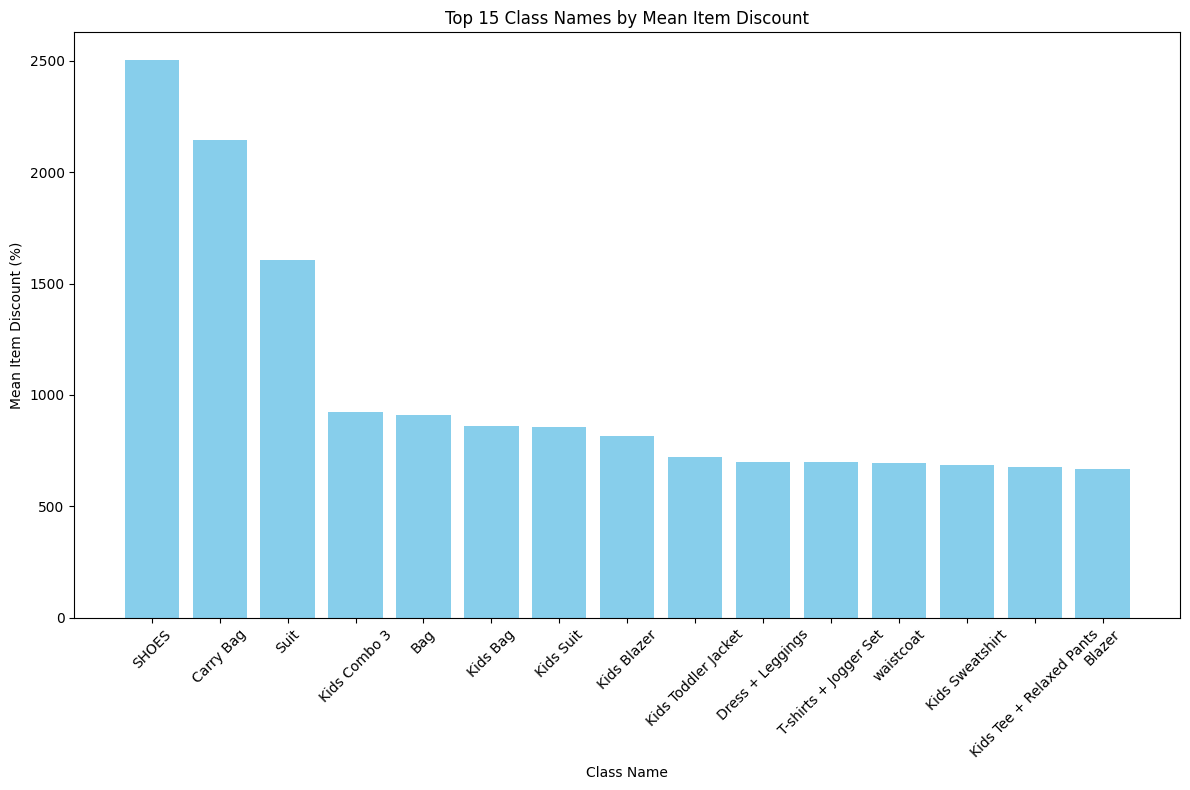

In [26]:
import pandas as pd
import matplotlib.pyplot as plt




# Calculate mean item discount for each class name
class_discount_mean = df.groupby('Class Name')['Item Discount'].mean().reset_index()

# Select top 15 classes by mean item discount
top_15_classes = class_discount_mean.nlargest(15, 'Item Discount')

# Plotting the bar graph for top 15 classes
plt.figure(figsize=(12, 8))
plt.bar(top_15_classes['Class Name'], top_15_classes['Item Discount'], color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Mean Item Discount (%)')
plt.title('Top 15 Class Names by Mean Item Discount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



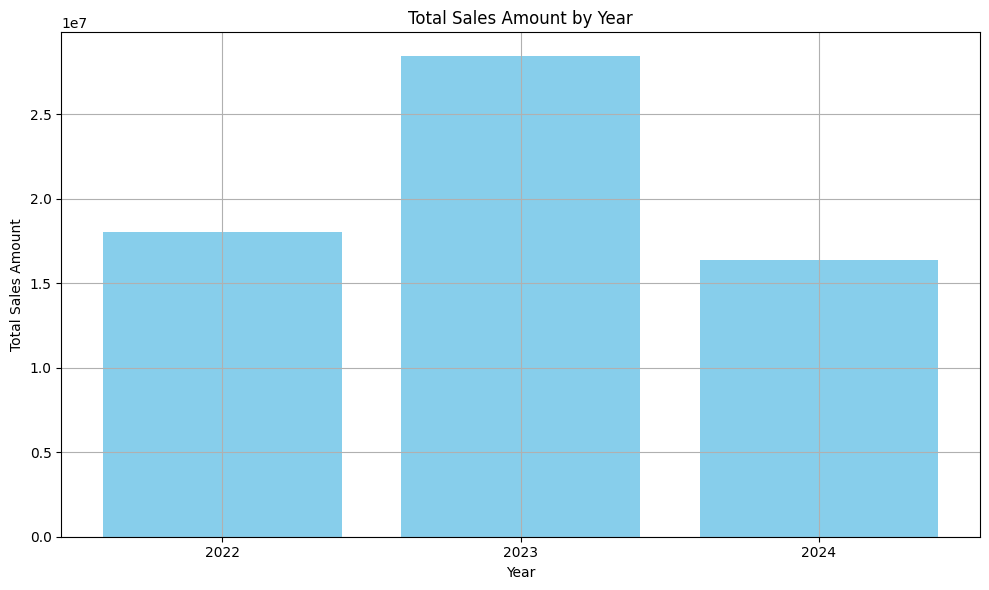

In [27]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert 'Bill Date' to datetime
df['Bill Date'] = pd.to_datetime(df['Bill Date'], format='%d-%m-%Y', errors='coerce')

# Extract year from 'Bill Date'
df['Year'] = df['Bill Date'].dt.year

# Aggregate sales amount by year
yearly_sales = df.groupby('Year')['Value'].sum()

# Plotting total sales amount vs year using bar graph
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales.index, yearly_sales.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Year')
plt.xticks(yearly_sales.index)  # Ensure all years are displayed on x-axis
plt.grid(True)
plt.tight_layout()
plt.show()





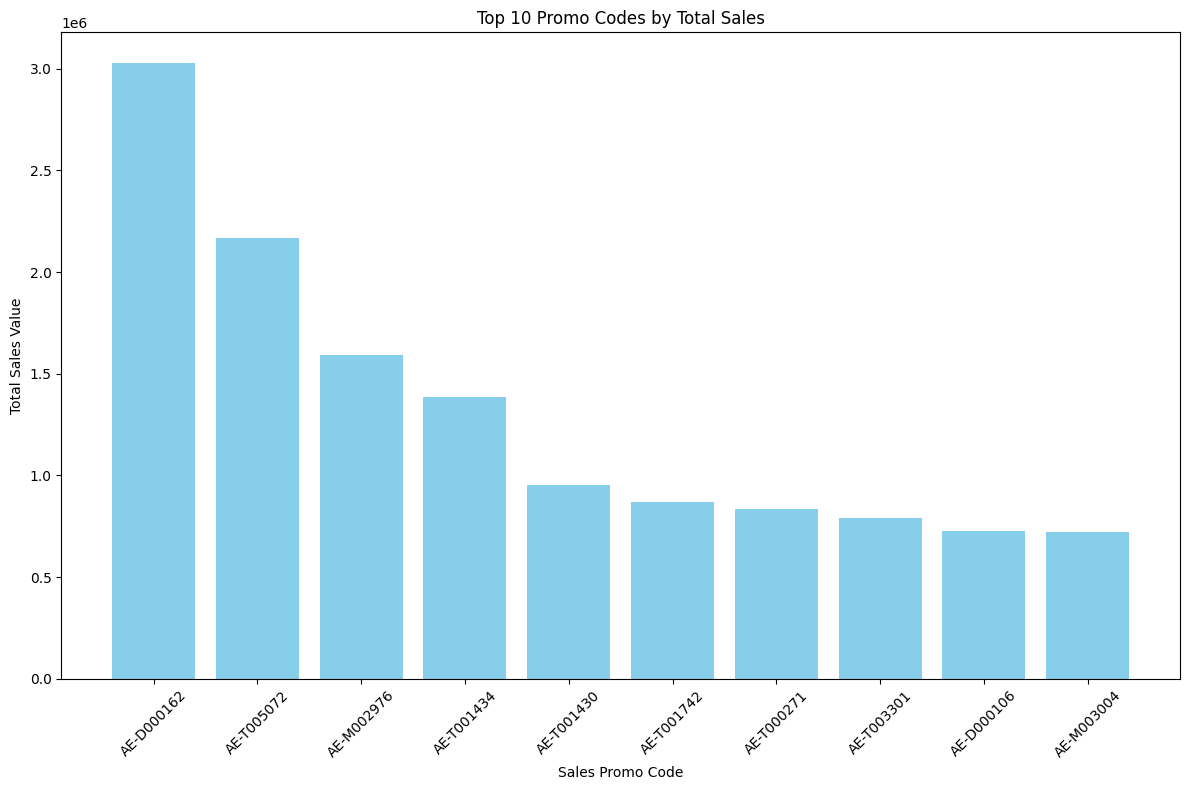

In [28]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'Sales Promo Code' and aggregate sales
promo_sales = df.groupby('Sales Promo Code')['Value'].sum().reset_index()

# Select top 10 promo codes by total sales
top_10_promo = promo_sales.nlargest(10, 'Value')

# Plotting the bar graph for top 10 promo codes
plt.figure(figsize=(12, 8))
plt.bar(top_10_promo['Sales Promo Code'], top_10_promo['Value'], color='skyblue')
plt.xlabel('Sales Promo Code')
plt.ylabel('Total Sales Value')
plt.title('Top 10 Promo Codes by Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






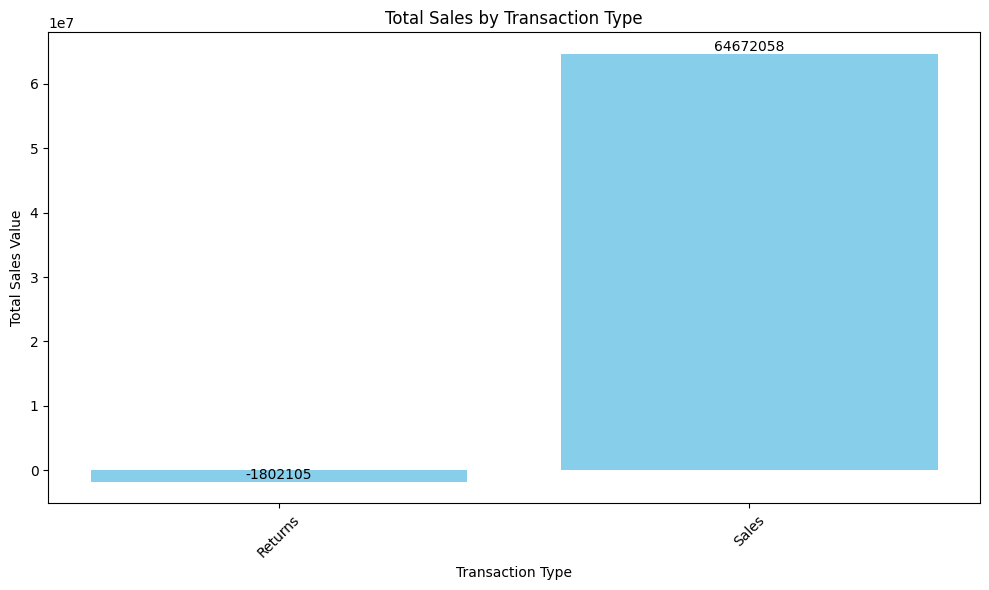

In [29]:
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'Transaction Type' and aggregate sales
transaction_sales = df.groupby('Transaction Type')['Value'].sum().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(transaction_sales['Transaction Type'], transaction_sales['Value'], color='skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Total Sales Value')
plt.title('Total Sales by Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


